In [ ]:
!git clone https://github.com/aman190202/udemy-nerf.git
%cd udemy-nerf/

In [1]:
import torch
import torch.nn as nn
import numpy as np

import os
import imageio
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from dataset import get_rays
from rendering import rendering
from model import Voxels
from ml_helpers import training

# Camera / Dataset

In [2]:
batch_size = 1024

o, d, target_px_values = get_rays('fox', mode='train')
dataloader = DataLoader(torch.cat((torch.from_numpy(o).reshape(-1, 3),
                                   torch.from_numpy(d).reshape(-1, 3),
                                   torch.from_numpy(target_px_values).reshape(-1, 3)), dim=1),
                       batch_size=batch_size, shuffle=True)


dataloader_warmup = DataLoader(torch.cat((torch.from_numpy(o).reshape(90, 400, 400, 3)[:, 100:300, 100:300, :].reshape(-1, 3),
                               torch.from_numpy(d).reshape(90, 400, 400, 3)[:, 100:300, 100:300, :].reshape(-1, 3),
                               torch.from_numpy(target_px_values).reshape(90, 400, 400, 3)[:, 100:300, 100:300, :].reshape(-1, 3)), dim=1),
                       batch_size=batch_size, shuffle=True)


test_o, test_d, test_target_px_values = get_rays('fox', mode='test')

(90, 400, 400, 4)
(10, 400, 400, 4)


# Training

In [3]:
model = torch.load("model_nerf")
model.eval()

Voxels()

In [5]:
device = 'cpu'
tn = 8
tf = 12
nb_epochs = 15
lr = 1e-3
gamma = .5
nb_bins = 100


In [ ]:
model = Voxels(scale=3, device=device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10], gamma=gamma)
training_loss = training(model, optimizer, scheduler, tn, tf, nb_bins, 1, dataloader_warmup, device=device)
plt.plot(training_loss)
plt.show()
training_loss = training(model, optimizer, scheduler, tn, tf, nb_bins, nb_epochs, dataloader, device=device)
plt.plot(training_loss)
plt.show()

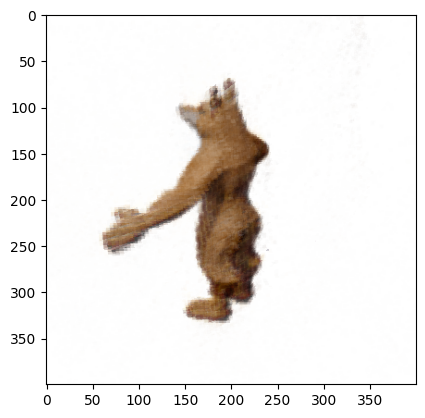

In [6]:
img = rendering(model, torch.from_numpy(o[0]).to(device), torch.from_numpy(d[0]).to(device), 
                tn, tf, nb_bins=100, device=device)
plt.imshow(img.reshape(400, 400, 3).data.cpu().numpy())

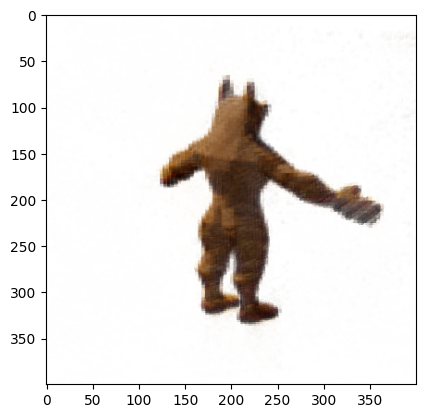

In [7]:
img = rendering(model, torch.from_numpy(o[2]).to(device), torch.from_numpy(d[2]).to(device), 
                tn, tf, nb_bins=100, device=device)
plt.imshow(img.reshape(400, 400, 3).data.cpu().numpy())

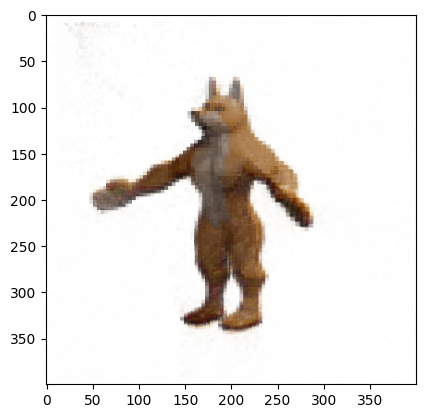

In [8]:
img = rendering(model, torch.from_numpy(o[3]).to(device), torch.from_numpy(d[3]).to(device), 
                tn, tf, nb_bins=100, device=device)
plt.imshow(img.reshape(400, 400, 3).data.cpu().numpy())

In [ ]:
torch.save(model,'model_nerf')